In [16]:
from HW2_solutions import average
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("data/first_run.csv")


## Determine the warmup period


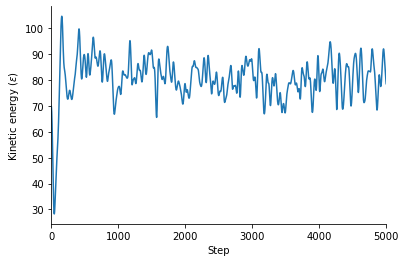

In [17]:
plt.plot("KE", data=df)
plt.xlim(0,5000)
plt.xlabel("Step")
plt.ylabel("Kinetic energy ($\epsilon$)")
sns.despine()
plt.savefig("init_kinetic_energy.pdf", bbox_inches='tight')

Warmup is around 1000 steps


In [18]:
ke, ke_err, kappa, var = average(df['KE'].values[1000:])
var

29.24192914752079

In [19]:
ke, ke_err, ke*0.05

(81.81245598394803, 0.11603692005135101, 4.090622799197401)

In [20]:
energy, energy_err, kappa, var = average((df['KE']+df['PE']).values[1000:])
print(var)

0.00011433351189947923


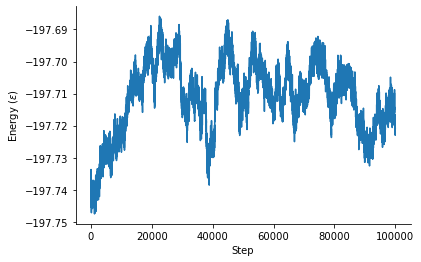

In [21]:
plt.plot(df['KE'] + df['PE'])
plt.xlabel("Step")
plt.ylabel("Energy ($\epsilon$)")
sns.despine()
plt.savefig("init_total.pdf", bbox_inches='tight')

You can also choose a warmup time in a more systematic way, by checking to see that the averages don't change. 

Text(0, 0.5, 'Kinetic energy ($\\sigma')

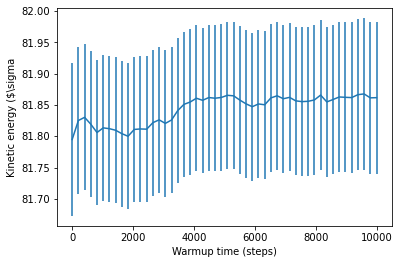

In [24]:
warmups = []
kes=[]
ke_errs=[]
for warmup in np.linspace(0,10000,50):
    ke, ke_err, kappa, var = average(df['KE'].values[int(warmup):])
    warmups.append(int(warmup))
    kes.append(ke)
    ke_errs.append(ke_err)
plt.errorbar(warmups, kes, ke_errs)
plt.xlabel("Warmup time (steps)")
plt.ylabel("Kinetic energy ($\sigma")